In [18]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 1

In [26]:
theta = 0
sigma = 1
n = 50

In [27]:
ns = [20, 50, 100]
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1 ,2]

In [28]:
weights_unbiased_3 = np.random.rand(n)

In [29]:
theta_hat = norm.rvs(theta, sigma, n)

In [30]:
def est_1(theta_hat):
    return theta_hat.mean()

def est_2(theta_hat):
    return np.median(theta_hat)

def est_3(theta_hat, weights_unbiased_3):
    weights_3 = weights_unbiased_3 / weights_unbiased_3.sum()
    return np.sum(weights_3 * theta_hat)

def weight_4_gen(i):
        return norm.pdf(norm.ppf((i - 1) / n)) - norm.pdf(norm.ppf(i / n))

def est_4(theta_hat, n):
    theta_hat_sorted = np.sort(theta_hat)
    weights_4 = np.array([weight_4_gen(i) for i in range(1, n + 1)])
    return np.sum(theta_hat_sorted * weights_4)

def est_5(theta_hat, n):
    return n / np.sum(1 / theta_hat)

def est_6(theta_hat):
    return np.cbrt(np.sum(theta_hat ** 3) / len(theta_hat))

def est_7(theta_hat):
    return np.power(np.sum(theta_hat ** 2) / len(theta_hat), 1/2)

In [31]:
res = []
for _ in range(1000):
    theta_hat = norm.rvs(theta, sigma, n)
    res.append([
        est_1(theta_hat),
        est_2(theta_hat),
        est_3(theta_hat, weights_unbiased_3),
        est_4(theta_hat, n),
        est_5(theta_hat, n),
        est_6(theta_hat),
        est_7(theta_hat)
    ])

In [32]:
res_df = pd.DataFrame(res, columns=['1', '2', '3', '4', '5', '6', '7'])

In [33]:
res_df

,1,2,3,4,5,6,7
0,-0.038597,-0.008740,-0.044620,1.181245,0.527353,-0.807478,1.188687
1,-0.060884,-0.115863,-0.126493,0.778821,1.077182,0.487341,0.793573
2,0.203342,0.085503,0.233392,1.071483,0.271306,1.096234,1.109538
3,0.119754,0.114752,-0.090021,1.069418,0.680677,0.551262,1.086542
4,-0.151877,-0.035166,-0.215892,1.024409,-0.472599,-0.812296,1.047313
...,...,...,...,...,...,...,...
995,0.211798,0.116456,0.163766,0.945947,0.163641,0.959569,0.984010
996,0.231106,0.207204,0.276254,0.897118,-0.129302,0.734684,0.939259
997,-0.138977,-0.100345,-0.126871,0.818995,-1.417592,-0.690851,0.851020
998,0.016852,0.043772,-0.002801,0.898003,-0.566526,-0.310847,0.905385


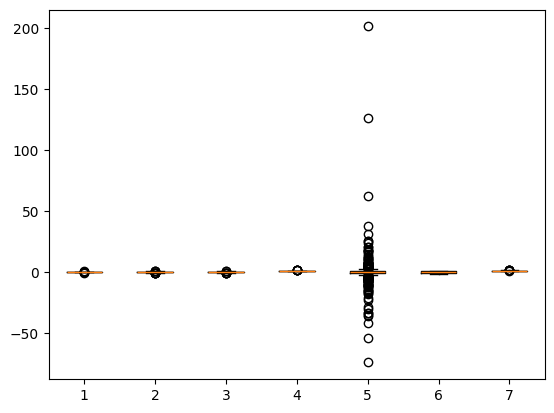

In [34]:
plt.boxplot(res_df)
plt.show()

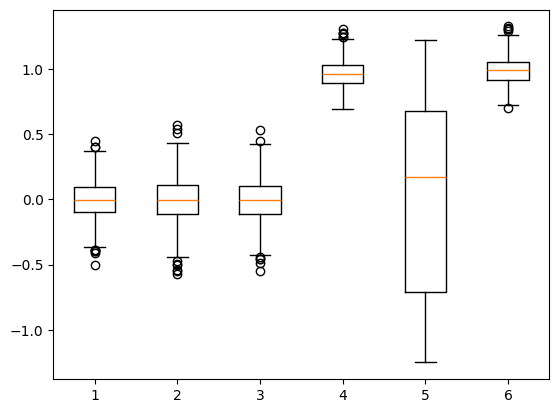

In [35]:
dropped_5_df = res_df.drop('5', axis=1)
plt.boxplot(dropped_5_df)
plt.show()

In [ ]:
# 4 estymator powininen byc kolo 0

In [ ]:
# do zrobienia do konca to zadanie

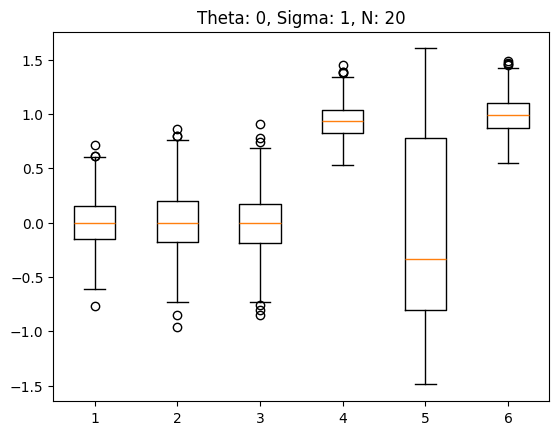

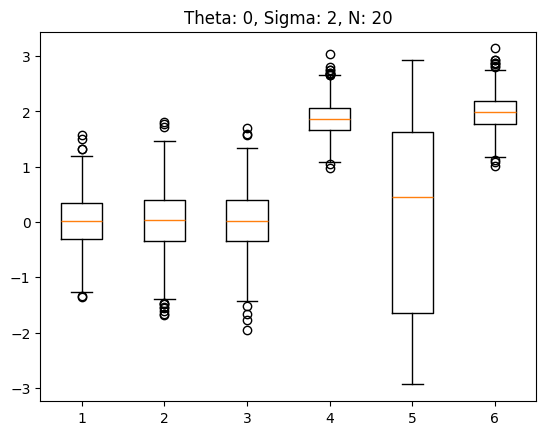

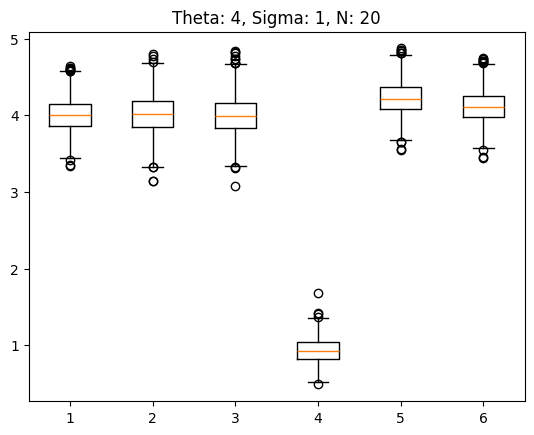

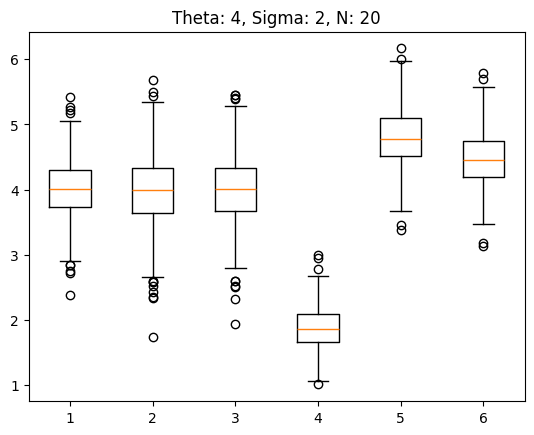

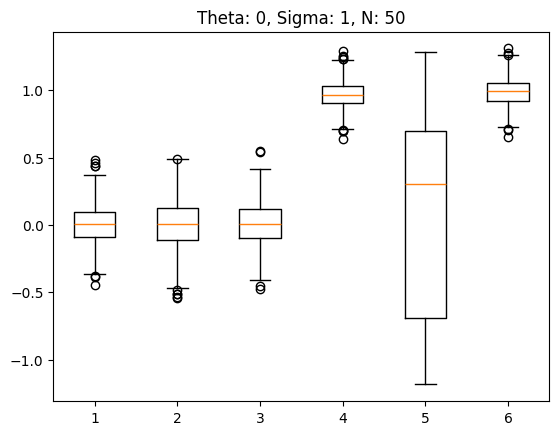

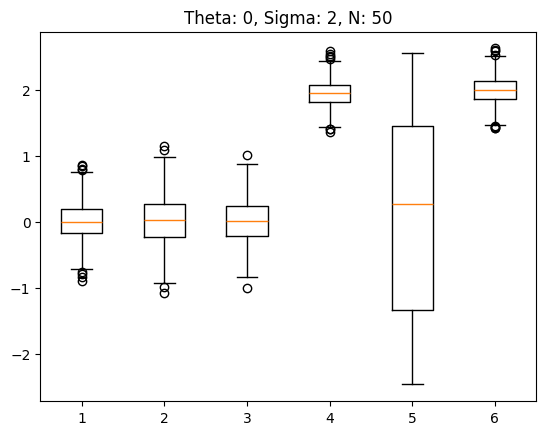

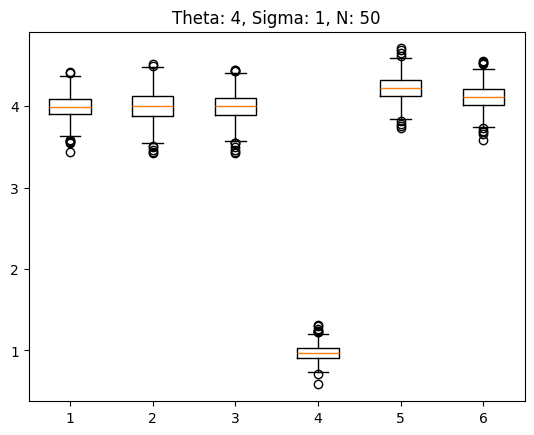

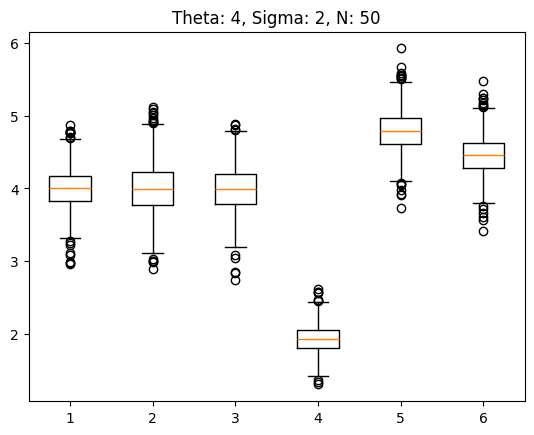

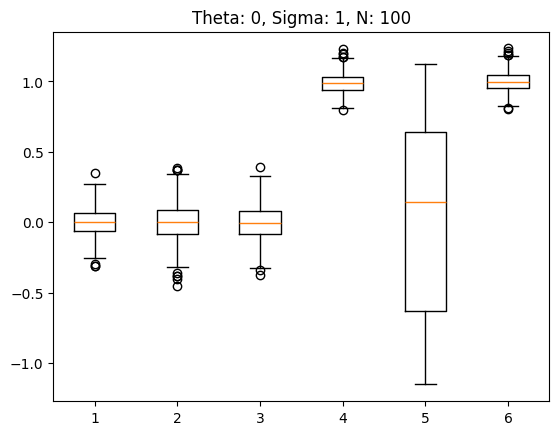

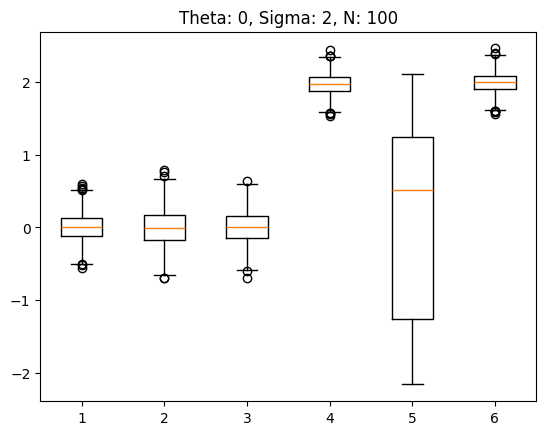

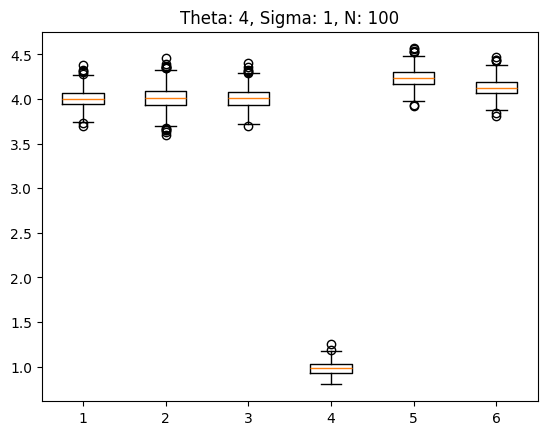

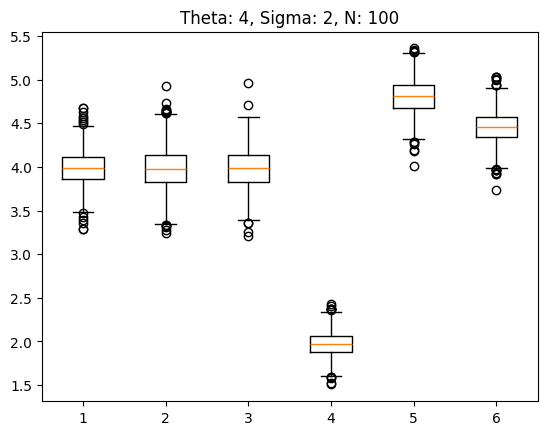

In [36]:
for n in ns:
    for i in range(4):
        theta, sigma = thetas[i], sigmas[i]
        weights_unbiased_3 = np.random.rand(n)
        res = []
        for _ in range(1000):
            theta_hat = norm.rvs(theta, sigma, n)
            res.append([
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                #est_5(theta_hat, n), without est5
                est_6(theta_hat),
                est_7(theta_hat)
            ])
        res_df = pd.DataFrame(res, columns=['1', '2', '3', '4', '6', '7'])
        plt.boxplot(res_df)
        plt.title(f'Theta: {theta}, Sigma: {sigma}, N: {n}')
        plt.show()


# Zadanie 2

In [19]:
from scipy.stats import norm, cauchy, logistic

In [40]:
n = 50
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

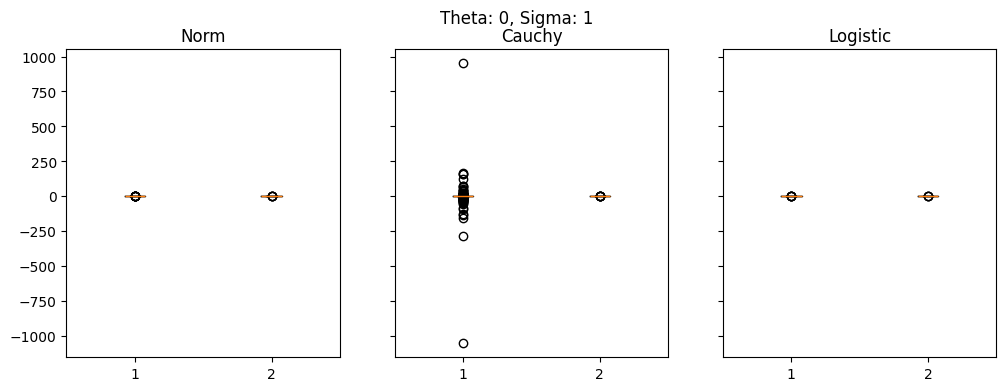

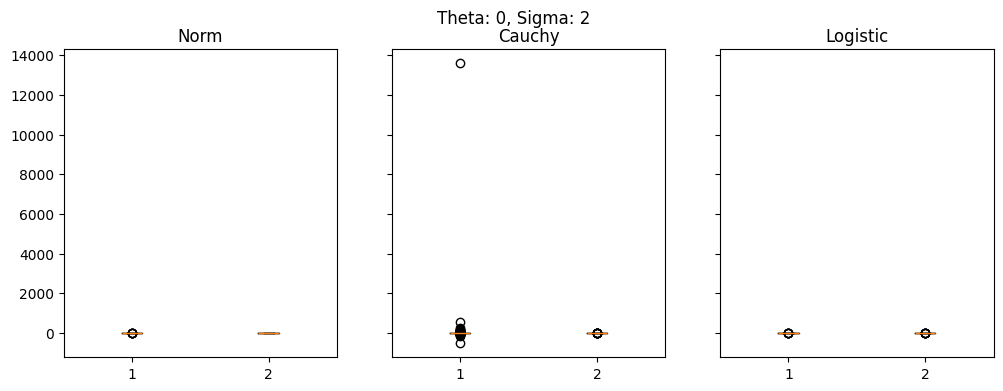

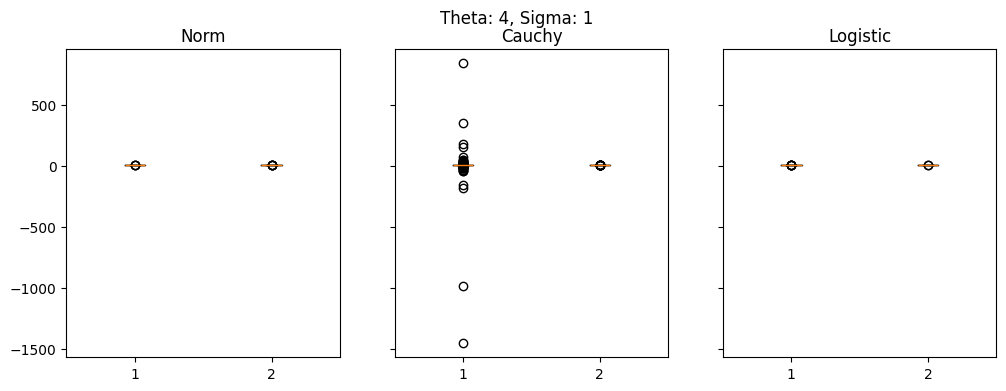

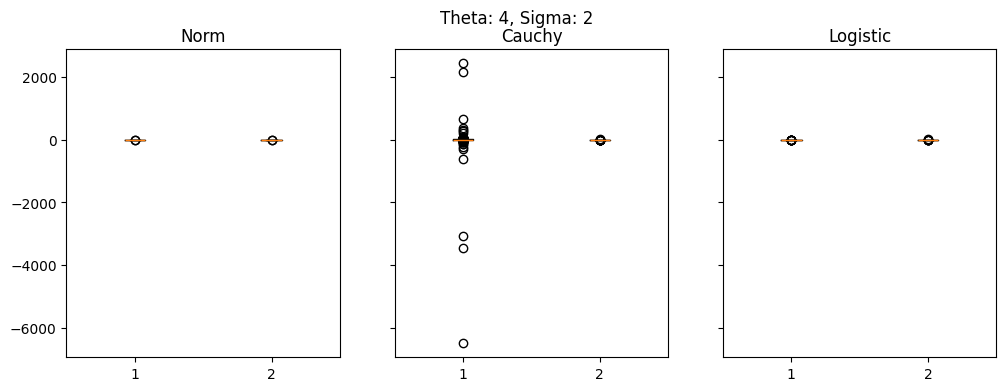

In [60]:
for theta, sigma in zip(thetas, sigmas):
    res_norm = []
    res_cauchy = []
    res_logistic = []
    for _ in range(1000):

        norm_vector = norm.rvs(loc=theta, scale=sigma, size=n)
        cauchy_vector = cauchy.rvs(loc=theta, scale=sigma, size=n)
        logistic_vector = logistic.rvs(loc=theta, scale=sigma, size=n)

        est_norm_mean = norm_vector.mean()
        est_norm_med = np.median(norm_vector)
        res_norm.append([est_norm_mean, est_norm_med])

        est_cauchy_mean = cauchy_vector.mean()
        est_cauchy_med = np.median(cauchy_vector)
        res_cauchy.append([est_cauchy_mean, est_cauchy_med])

        est_logistic_mean = logistic_vector.mean()
        est_logistic_med = np.median(logistic_vector)
        res_logistic.append([est_logistic_mean, est_logistic_med])

    fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

    axes[0].boxplot(pd.DataFrame(res_norm, columns=['1', '2']))
    axes[0].title.set_text('Norm')
    axes[1].boxplot(pd.DataFrame(res_cauchy, columns=['1', '2']))
    axes[1].title.set_text('Cauchy')
    axes[2].boxplot(pd.DataFrame(res_logistic, columns=['1', '2']))
    axes[2].title.set_text('Logistic')
    fig.suptitle(f'Theta: {theta}, Sigma: {sigma}')


plt.show()